# Example 1: Simple Addition Agent

In [ ]:
#Step 1: Install LangGraph
!pip install langgraph

In [4]:
# Step 2: Define State
# What data do we need?

# The numbers to add
# The result
from typing_extensions import TypedDict

class State(TypedDict):
    num_a:int
    num_b:int
    result:int  

In [15]:
#Step 3: Create Nodes
def add_nums(state: State):
    final= state['num_a'] + state['num_b']
    return {"result":final}

def display_final_ans(state: State):
    print(f"Final answer of the addition is: {state['result']}")
    return {}

In [16]:
#Step 4: Build the Graph
from langgraph.graph import StateGraph, START, END

# Create graph
graph = StateGraph(State)

In [17]:
# Add nodes
graph.add_node("node 1 addition",add_nums)
graph.add_node("display_result", display_final_ans)

In [18]:
# Connect nodes through adding edges
graph.add_edge(START,"node 1 addition")
graph.add_edge("node 1 addition","display_result")
graph.add_edge("display_result",END)

In [19]:
# Compile
app = graph.compile()

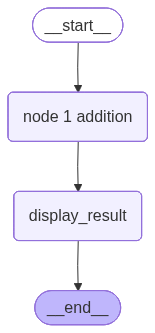

In [20]:
from IPython.display import Image, display

# Generate and display PNG
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({
    "num_a": 5,
    "num_b": 3,
    "result": 0
})

Final answer of the addition is: 8
